In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


%config Completer.use_jedi = False

In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, activations,losses


In [5]:
breeds = ["beagle", "bernese_mountain_dog", "doberman", "labrador_retriever", "siberian_husky"]
args = {
    "labels": "inferred",
    "label_mode": "categorical",
    "batch_size": 32,
    "image_size": (256, 256),
    "seed": 1,
    "validation_split": .2,
    "class_names": breeds
}

train = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/dog-breeds/images",
    subset="training",
    **args
)

test = tf.keras.utils.image_dataset_from_directory(
  "/kaggle/input/dog-breeds/images",
  subset="validation",
    **args
)
train = train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 926 files belonging to 5 classes.
Using 741 files for training.
Found 926 files belonging to 5 classes.
Using 185 files for validation.


In [6]:
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [7]:
firstTake = train.take(1)
firstTake

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

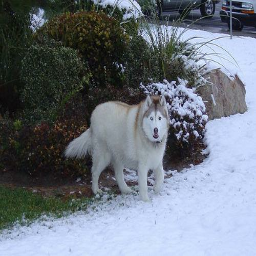

In [15]:
images, labels = list(firstTake)[0]


firstImage = images[0]
numpyImage = firstImage.numpy().astype("uint8")
Image.fromarray(numpyImage)

In [16]:
print(labels[0])

tf.Tensor([0. 0. 0. 0. 1.], shape=(5,), dtype=float32)


In [27]:
model = Sequential([
    layers.Rescaling(1/255),
    layers.Conv2D(filters = 16, kernel_size = 4, padding = "same", activation = activations.relu),
    layers.MaxPool2D(pool_size = 4, padding = "valid", strides = 2),
    layers.Conv2D(filters = 32, kernel_size = 4, padding = "same", activation =  activations.relu),
    layers.MaxPool2D(pool_size = 4, padding = "valid", strides = 2),
    layers.Conv2D(filters = 64, kernel_size = 4, padding = "same", activation =  activations.relu),
    layers.MaxPool2D(pool_size = 4, padding = "valid", strides = 2),
    layers.Flatten(),
    layers.Dense(units = 128, activation = activations.relu ),
    layers.Dense(units = labels.shape[1], activation = activations.sigmoid)
])

In [43]:
model.compile(optimizer='adam', 
          loss=losses.CategoricalCrossentropy(), 
          metrics=['accuracy'])

In [44]:
history = model.fit(train, validation_data=test, epochs = 10)

Epoch 1/10
24/24 [==============================] - 46s 2s/step - loss: 1.6216 - accuracy: 0.2551 - val_loss: 1.5941 - val_accuracy: 0.2973
Epoch 2/10
24/24 [==============================] - 43s 2s/step - loss: 1.5038 - accuracy: 0.3657 - val_loss: 1.7693 - val_accuracy: 0.2973
Epoch 3/10
24/24 [==============================] - 42s 2s/step - loss: 1.4253 - accuracy: 0.3968 - val_loss: 1.6151 - val_accuracy: 0.3243
Epoch 4/10
24/24 [==============================] - 43s 2s/step - loss: 1.1324 - accuracy: 0.5479 - val_loss: 1.6491 - val_accuracy: 0.4000
Epoch 5/10
24/24 [==============================] - 42s 2s/step - loss: 0.8020 - accuracy: 0.7004 - val_loss: 2.1990 - val_accuracy: 0.3189
Epoch 6/10
24/24 [==============================] - 42s 2s/step - loss: 0.5735 - accuracy: 0.7976 - val_loss: 2.4918 - val_accuracy: 0.3189
Epoch 7/10
24/24 [==============================] - 43s 2s/step - loss: 0.4845 - accuracy: 0.8232 - val_loss: 2.9499 - val_accuracy: 0.3297
Epoch 8/10
24/24 [==